In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# Trajektorie cząstek w 1b)

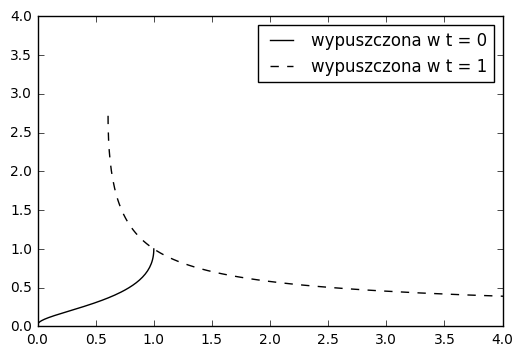

In [9]:
t = np.linspace(0, 6, 200)
x = np.exp(-t*t/2)
y = np.exp(-t)
plt.plot(x,y, "k-", label="wypuszczona w t = 0")
x = np.exp(-0.5+t*t/2)
y = np.exp(1-t)
plt.xlim(0,4)
plt.ylim(0,4)
plt.plot(x,y, "k--", label="wypuszczona w t = 1");
plt.legend()

# Linie prądu w 1b

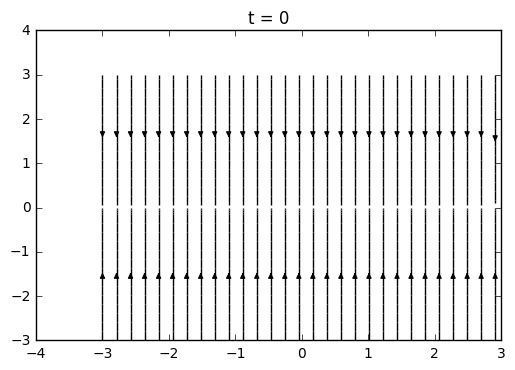

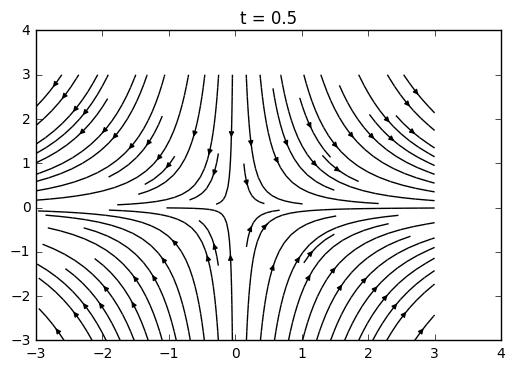

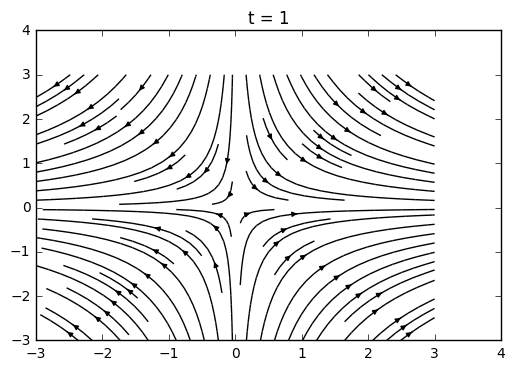

In [12]:
x = y = np.linspace(-3,3)
X, Y = np.meshgrid(x,y)

for t in [0, 0.5, 1]:
    plt.title("t = {}".format(t))
    plt.streamplot(X, Y, X*t, -Y, color='black')
    plt.show()

# Zadanie 2

/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in true_divide


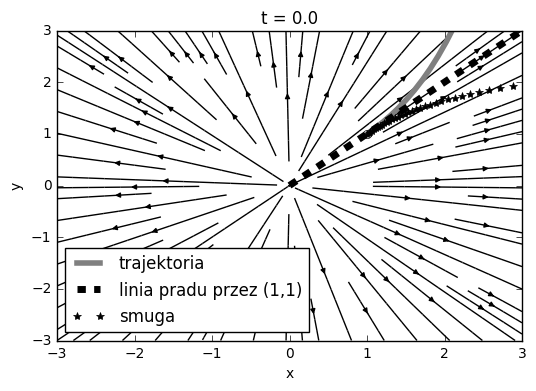

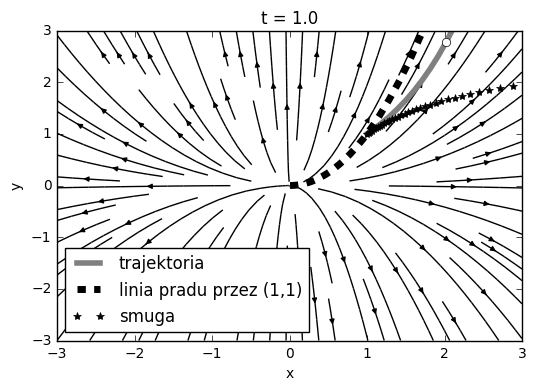

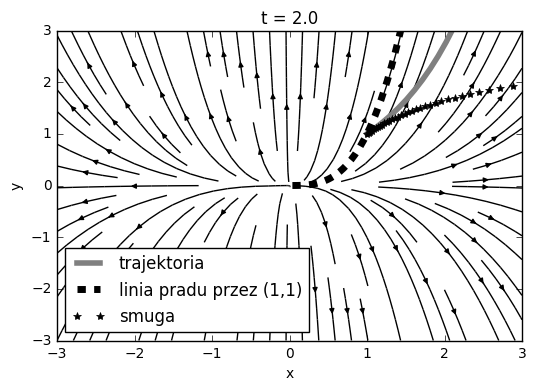

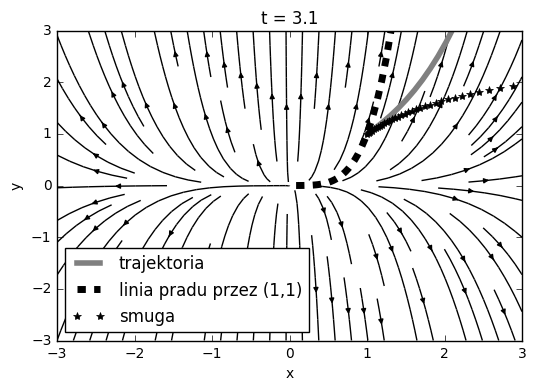

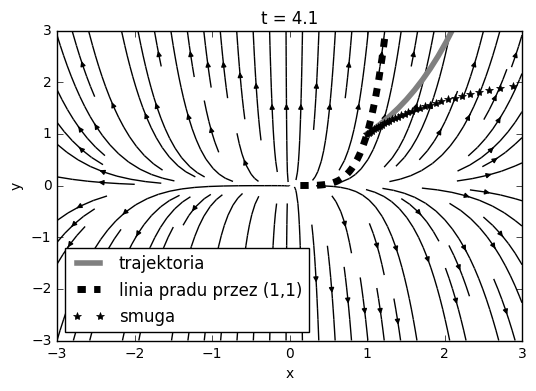

In [44]:
def f(r, t):
    x, y = r
    return np.array([x/(1+t), y])

r = np.array((1,1))
T = np.linspace(0, 5)
x, y = odeint(f,r,T).T
theta = np.linspace(-10,10,100)

for i, t in enumerate(T):
    if i % 10 == 0:
        Ux = X/(1+t)
        Uy = Y
        plt.plot(x, y, "-", color="gray", lw=4, label="trajektoria")
        plt.plot([x[i]], [y[i]], "wo",)
        plt.streamplot(X, Y, Ux, Uy, color='black')
        plt.plot(np.exp(theta/(1+t)), np.exp(theta), "k--", lw=5, label="linia pradu przez (1,1)")
        plt.xlim(-3,3)
        plt.ylim(-3,3)
        plt.title("t = {:.1f}".format(t))
        plt.legend(loc = 'lower left')

        
        t0 = np.linspace(0,1,50)
        ts = 1
        xs = ts/t0
        ys = np.exp(ts-t0)

        plt.plot(xs, ys, "k*", label="smuga")
        plt.legend(loc = 'lower left')
        plt.xlabel('x')
        plt.ylabel('y')
        
        plt.show()

# Zadanie 3

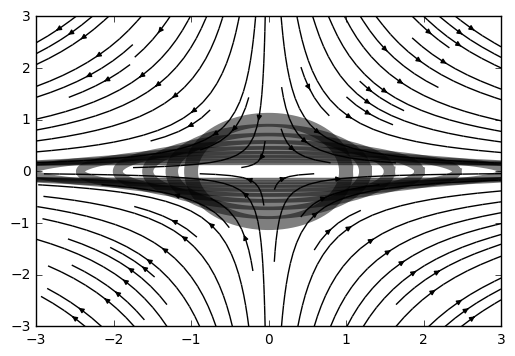

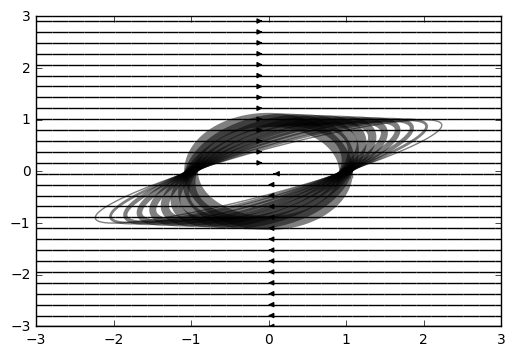

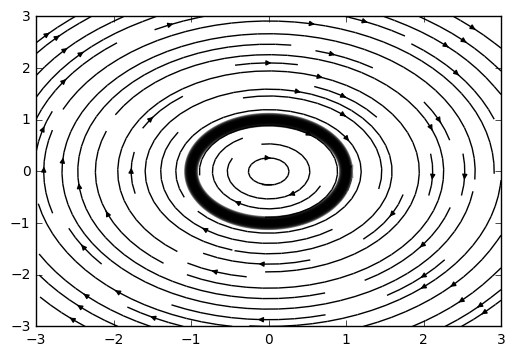

In [45]:
k = 1
def z3(Ux, Uy, rotation):
#     plt.contourf(X, Y, rotation(X, Y))
    sp = plt.streamplot(X, Y, Ux(X,Y), Uy(X,Y), color="black")
    phi = np.linspace(0, 2*np.pi, 100)
    x, y = np.cos(phi), np.sin(phi)
    R = np.vstack((x,y)).T
    t = np.linspace(0, 2, 10)
    circles = np.zeros((t.size, phi.size, 2))
    def f(r, t):
        x, y = r
        Vx = Ux(x, y)
        Vy = Uy(x, y)
        V = np.hstack((Vx, Vy))
        return V
    for i, r in enumerate(R):
        x, y = odeint(f, r, t).T
        circles[:, i, 0] = x
        circles[:, i, 1] = y
#         plt.plot(x,y)
    for i, c in enumerate(circles):
        x, y = c.T
        plt.plot(x,y, "k-", lw=len(circles)-i, alpha=0.5)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.show()

z3(lambda X, Y: k*X, lambda X, Y: -k*Y, lambda X, Y: np.zeros_like(X))
z3(lambda X, Y: k*Y, lambda X, Y: np.zeros_like(X), lambda X, Y: np.zeros_like(X))
z3(lambda X, Y: k*Y, lambda X, Y: -k*X, lambda X, Y: -2*np.ones_like(X))

# To powinna być linia prądu w 3a, ale nie wygląda. Chyba do końca ich nie rozumiem.

/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
/home/dominik/.anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


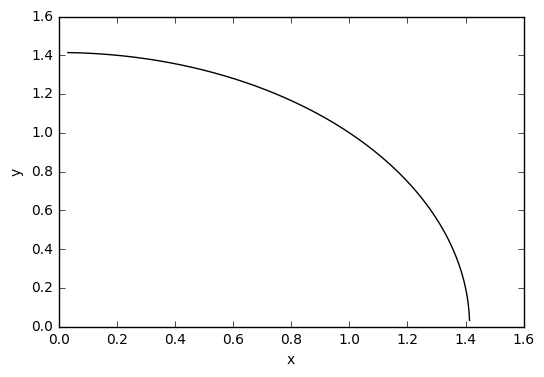

In [49]:
delta = np.linspace(-1, 1, 1000)
k = 1
x0, y0 = 1, 1
x = np.sqrt(2*delta/k+x0**2)
y = np.sqrt(y0**2 - 2*delta/k)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, "k-");